## Импорты

In [1022]:
import mne
import neurokit2 as nk
import numpy as np
import pandas as pd
import pickle
import sklearn as sk
from sklearn.linear_model import LinearRegression

from helper import MicrostateHelperWrapper as MSHW

## Константы

In [2]:
# sampling_rate = 2048

raw_data_folder_path = "./raw_data"
preprocessed_data_folder_path = "./preprocessed_data"
save_data_folder_path = "./save_data"
images_folder_path = "./images"


filenames014 = [
    "ACP_INP0014_REST1_1pnt_1vis",
    "ACP_INP0014_REST2_1pnt_1vis",
    "ACP_INP0014_REST3_1pnt_1vis",
    "ACP_INP0014_REST1_1pnt_2vis",
    "ACP_INP0014_REST2_1pnt_2vis",
    "ACP_INP0014_REST3_1pnt_2vis"
]
path014 = preprocessed_data_folder_path + "/rest_14"

filenames019 = [
    "INP0019_v1.4_REST1_R003_R003_08.11.23",
    "INP0019_v1.4_REST2_R003_R003_08.11.23",
    "INP0019_v1.4_REST3_R003_R003_08.11.23",
    "INP0019_v1.5_REST2_Op005_Op007_08.12.23",
    "INP0019_v1.5_REST3_Op005_Op007_08.12.23",
]
path019 = preprocessed_data_folder_path + "/rest_19"

filenames036 = [
    "INP0036_v1.4_REST1_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST2_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST3_Op008_Op011_11.12.23",
    "INP0036_v1.5_REST1_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST2_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST3_Op005_Op010_12.12.23",
]
path036 = preprocessed_data_folder_path + "/rest_36"

filenames045 = [
    "INP0045_v1.4_REST1_R003_R003_08.11.23",
    "INP0045_v1.4_REST2_R003_R003_08.11.23",
    "INP0045_v1.4_REST3_R003_R003_08.11.23",
    "INP0045_v1.5_rs11_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs22_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs23_Op005_Op008_Op011_17.11.23",
]
path045 = preprocessed_data_folder_path + "/rest_45"

filenames064 = [
    "INP0064_v1.4_rs11_S008_R003_04.12.23",
    "INP0064_v1.4_rs12_Op008_R003_04.12.23",
    "INP0064_v1.4_rs13_Op008_R003_04.12.23",
    "INP0064_v1.5_rs21_Op005_Op006_Op008_05.12.23",
    "INP0064_v1.5_rs22_Op009_A002_13.12.23",
    "INP0064_v1.5_rs23_Op009_A002_13.12.23",
]
path064 = preprocessed_data_folder_path + "rest_64"

# MICROSTATES

## Meaned mean

In [912]:
mean_vals = pd.DataFrame()
current_dataset = "64"

for filen in filenames064:
    # filename = 'save_data/ms_event_splited_statistics/dynamic/mean/'+filen+'_th_mean.csv'
    filename = 'save_data/ms_event_splited_statistics/dynamic/'+filen+'_th.csv'
    print("Reading file", filename)
    df = pd.read_csv(filename)
    df["File"] = filen
    mean_vals = pd.concat([mean_vals, df])

Reading file save_data/ms_event_splited_statistics/dynamic/INP0064_v1.4_rs11_S008_R003_04.12.23_th.csv
Reading file save_data/ms_event_splited_statistics/dynamic/INP0064_v1.4_rs12_Op008_R003_04.12.23_th.csv
Reading file save_data/ms_event_splited_statistics/dynamic/INP0064_v1.4_rs13_Op008_R003_04.12.23_th.csv
Reading file save_data/ms_event_splited_statistics/dynamic/INP0064_v1.5_rs21_Op005_Op006_Op008_05.12.23_th.csv
Reading file save_data/ms_event_splited_statistics/dynamic/INP0064_v1.5_rs22_Op009_A002_13.12.23_th.csv
Reading file save_data/ms_event_splited_statistics/dynamic/INP0064_v1.5_rs23_Op009_A002_13.12.23_th.csv


In [913]:
mean_vals.drop('Unnamed: 0', axis=1, inplace=True)
mean_vals = drop_self_to_self(4, mean_vals)

In [914]:
mean_vals

,Microstate_0_to_1,Microstate_0_to_2,Microstate_0_to_3,Microstate_1_to_0,Microstate_1_to_2,Microstate_1_to_3,Microstate_2_to_0,Microstate_2_to_1,Microstate_2_to_3,Microstate_3_to_0,Microstate_3_to_1,Microstate_3_to_2,Event,Order,File
0,0.001579,0.003060,0.002764,0.003743,0.003223,0.002496,0.003249,0.002249,0.003311,0.003984,0.001478,0.003085,Closed,0,INP0064_v1.4_rs11_S008_R003_04.12.23
1,0.003703,0.002664,0.002859,0.002951,0.002767,0.002828,0.002835,0.002835,0.002706,0.003499,0.002659,0.003079,Opened,1,INP0064_v1.4_rs11_S008_R003_04.12.23
2,0.002126,0.003341,0.002177,0.004073,0.004161,0.002125,0.003339,0.002830,0.003226,0.003615,0.001965,0.004165,Closed,2,INP0064_v1.4_rs11_S008_R003_04.12.23
3,0.002859,0.002687,0.002344,0.003495,0.002039,0.001748,0.003474,0.002657,0.002452,0.002230,0.002890,0.003634,Opened,3,INP0064_v1.4_rs11_S008_R003_04.12.23
4,0.002410,0.003450,0.002410,0.002885,0.003286,0.002965,0.003858,0.002266,0.003307,0.003548,0.002295,0.003478,Closed,4,INP0064_v1.4_rs11_S008_R003_04.12.23
5,0.003201,0.002915,0.001715,0.003273,0.001720,0.002441,0.003008,0.003078,0.002099,0.003091,0.002919,0.003005,Opened,5,INP0064_v1.4_rs11_S008_R003_04.12.23
6,0.002117,0.002560,0.002905,0.003977,0.003787,0.002462,0.003390,0.002673,0.003324,0.004005,0.001576,0.003414,Closed,6,INP0064_v1.4_rs11_S008_R003_04.12.23
7,0.002758,0.002869,0.002207,0.003615,0.002879,0.002946,0.003067,0.003067,0.001762,0.003140,0.003446,0.001991,Opened,7,INP0064_v1.4_rs11_S008_R003_04.12.23
8,0.001800,0.003166,0.002856,0.003919,0.002893,0.003079,0.002724,0.002600,0.003838,0.002166,0.001950,0.003520,Closed,8,INP0064_v1.4_rs11_S008_R003_04.12.23
9,0.002564,0.002673,0.003054,0.004043,0.003032,0.002382,0.002954,0.003102,0.003176,0.003621,0.002668,0.002096,Opened,9,INP0064_v1.4_rs11_S008_R003_04.12.23


In [915]:
def mean_by_event(df):
    clone = df.copy()
    return clone.groupby('Event').mean()

In [916]:
def mean_by_transition_raw_stats(df):
    clone = df.copy()
    # clone.drop('Event', axis=1, inplace=True)
    clone.reset_index(drop=True, inplace=True)
    clone.set_index(['File', 'Event', 'Order'], inplace=True)
    return clone.T.mean().to_frame()

In [917]:
def mean_by_transition(df):
    clone = df.copy()
    # clone.drop('Event', axis=1, inplace=True)
    clone.reset_index(drop=True, inplace=True)
    clone.set_index(['File', 'Event'], inplace=True)
    return clone.T.mean().to_frame()


In [918]:
mbt = mean_by_transition_raw_stats(mean_vals)

In [919]:
mbt

0
File                                         Event  Order          
INP0064_v1.4_rs11_S008_R003_04.12.23         Closed 0      0.002852
                                             Opened 1      0.002949
                                             Closed 2      0.003095
                                             Opened 3      0.002709
                                             Closed 4      0.003013
                                             Opened 5      0.002705
                                             Closed 6      0.003016
                                             Opened 7      0.002812
                                             Closed 8      0.002876
                                             Opened 9      0.002947
INP0064_v1.4_rs12_Op008_R003_04.12.23        Closed 0      0.003108
                                             Opened 1      0.002883
                                             Closed 2      0.002806
                                             Opened 3      0.002968
                                             Closed 4      0.002923
                                             Opened 5      0.002849
                                             Closed 6      0.002985
                                             Opened 7      0.002943
                                             Closed 8      0.002896
                                             Opened 9      0.002877
INP0064_v1.4_rs13_Op008_R003_04.12.23        Closed 0      0.002978
                                             Opened 1      0.002782
                                             Closed 2      0.003010
                                             Opened 3      0.002765
                                             Closed 4      0.002983
                                             Opened 5      0.002754
                                             Closed 6      0.003110
                                             Opened 7      0.002857
                                             Closed 8      0.002947
                                             Opened 9      0.002953
INP0064_v1.5_rs21_Op005_Op006_Op008_05.12.23 Closed 0      0.002940
                                             Opened 1      0.002849
                                             Closed 2      0.002997
                                             Opened 3      0.002629
                                             Closed 4      0.002998
                                             Opened 5      0.002787
                                             Closed 6      0.002867
                                             Opened 7      0.002703
                                             Closed 8      0.002959
                                             Opened 9      0.002662
INP0064_v1.5_rs22_Op009_A002_13.12.23        Closed 0      0.003019
                                             Opened 1      0.002677
                                             Closed 2      0.002974
                                                    3      0.002905
                                             Opened 4      0.002788
                                             Closed 5      0.003011
                                                    6      0.003132
                                             Opened 7      0.002766
INP0064_v1.5_rs23_Op009_A002_13.12.23        Closed 0      0.002884
                                             Opened 1      0.002707
                                             Closed 2      0.003012
                                             Opened 3      0.002771
                                             Closed 4      0.003053
                                             Opened 5      0.002800
                                             Closed 6      0.002926
                                             Opened 7      0.002811
                                             Closed 8      0.002908

In [920]:
mbtr = mbt.reset_index()
opened = mbtr[mbtr['Event'] == 'Opened'].copy()
closed = mbtr[mbtr['Event'] == 'Closed']
opened['Opened'] = opened[0]
opened.drop(0, axis=1, inplace=True)
# opened['Closed'] = closed
opened.drop('Event', axis=1, inplace=True)
opened.drop('File', axis=1, inplace=True)
opened.drop('Order', axis=1, inplace=True)
merged = opened.reset_index()
merged.drop('index', axis=1, inplace=True)

# for i in range(abs(len(merged['Opened'].values) - len(closed[0].values))):
#     # merged = merged.sort_index()
merged['Closed'] = closed[0].values[:len(merged['Opened'].values)]
merged

,Opened,Closed
0,0.002949,0.002852
1,0.002709,0.003095
2,0.002705,0.003013
3,0.002812,0.003016
4,0.002947,0.002876
5,0.002883,0.003108
6,0.002968,0.002806
7,0.002849,0.002923
8,0.002943,0.002985
9,0.002877,0.002896


In [921]:
mbtr.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/by_transition/'+current_dataset+'.csv')

<Axes: >

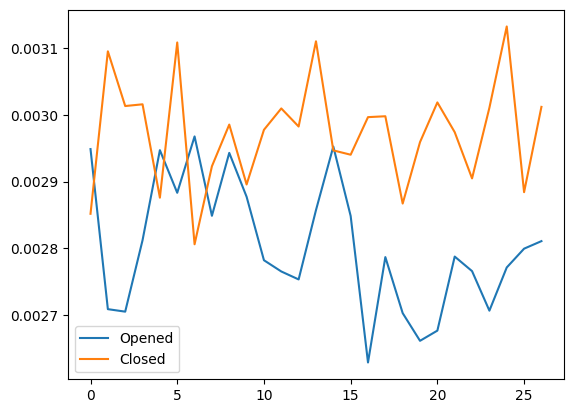

In [922]:
merged.plot()

In [923]:
merged.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/by_transition/'+current_dataset+'_merge.csv')


In [924]:
mean_vals

,Microstate_0_to_1,Microstate_0_to_2,Microstate_0_to_3,Microstate_1_to_0,Microstate_1_to_2,Microstate_1_to_3,Microstate_2_to_0,Microstate_2_to_1,Microstate_2_to_3,Microstate_3_to_0,Microstate_3_to_1,Microstate_3_to_2,Event,Order,File
0,0.001579,0.003060,0.002764,0.003743,0.003223,0.002496,0.003249,0.002249,0.003311,0.003984,0.001478,0.003085,Closed,0,INP0064_v1.4_rs11_S008_R003_04.12.23
1,0.003703,0.002664,0.002859,0.002951,0.002767,0.002828,0.002835,0.002835,0.002706,0.003499,0.002659,0.003079,Opened,1,INP0064_v1.4_rs11_S008_R003_04.12.23
2,0.002126,0.003341,0.002177,0.004073,0.004161,0.002125,0.003339,0.002830,0.003226,0.003615,0.001965,0.004165,Closed,2,INP0064_v1.4_rs11_S008_R003_04.12.23
3,0.002859,0.002687,0.002344,0.003495,0.002039,0.001748,0.003474,0.002657,0.002452,0.002230,0.002890,0.003634,Opened,3,INP0064_v1.4_rs11_S008_R003_04.12.23
4,0.002410,0.003450,0.002410,0.002885,0.003286,0.002965,0.003858,0.002266,0.003307,0.003548,0.002295,0.003478,Closed,4,INP0064_v1.4_rs11_S008_R003_04.12.23
5,0.003201,0.002915,0.001715,0.003273,0.001720,0.002441,0.003008,0.003078,0.002099,0.003091,0.002919,0.003005,Opened,5,INP0064_v1.4_rs11_S008_R003_04.12.23
6,0.002117,0.002560,0.002905,0.003977,0.003787,0.002462,0.003390,0.002673,0.003324,0.004005,0.001576,0.003414,Closed,6,INP0064_v1.4_rs11_S008_R003_04.12.23
7,0.002758,0.002869,0.002207,0.003615,0.002879,0.002946,0.003067,0.003067,0.001762,0.003140,0.003446,0.001991,Opened,7,INP0064_v1.4_rs11_S008_R003_04.12.23
8,0.001800,0.003166,0.002856,0.003919,0.002893,0.003079,0.002724,0.002600,0.003838,0.002166,0.001950,0.003520,Closed,8,INP0064_v1.4_rs11_S008_R003_04.12.23
9,0.002564,0.002673,0.003054,0.004043,0.003032,0.002382,0.002954,0.003102,0.003176,0.003621,0.002668,0.002096,Opened,9,INP0064_v1.4_rs11_S008_R003_04.12.23


In [925]:
mvi = mean_vals.drop(['Order', 'File'], axis=1)
mvf = mean_vals.drop(['Order', 'Event'], axis=1)
mvi

,Microstate_0_to_1,Microstate_0_to_2,Microstate_0_to_3,Microstate_1_to_0,Microstate_1_to_2,Microstate_1_to_3,Microstate_2_to_0,Microstate_2_to_1,Microstate_2_to_3,Microstate_3_to_0,Microstate_3_to_1,Microstate_3_to_2,Event
0,0.001579,0.003060,0.002764,0.003743,0.003223,0.002496,0.003249,0.002249,0.003311,0.003984,0.001478,0.003085,Closed
1,0.003703,0.002664,0.002859,0.002951,0.002767,0.002828,0.002835,0.002835,0.002706,0.003499,0.002659,0.003079,Opened
2,0.002126,0.003341,0.002177,0.004073,0.004161,0.002125,0.003339,0.002830,0.003226,0.003615,0.001965,0.004165,Closed
3,0.002859,0.002687,0.002344,0.003495,0.002039,0.001748,0.003474,0.002657,0.002452,0.002230,0.002890,0.003634,Opened
4,0.002410,0.003450,0.002410,0.002885,0.003286,0.002965,0.003858,0.002266,0.003307,0.003548,0.002295,0.003478,Closed
5,0.003201,0.002915,0.001715,0.003273,0.001720,0.002441,0.003008,0.003078,0.002099,0.003091,0.002919,0.003005,Opened
6,0.002117,0.002560,0.002905,0.003977,0.003787,0.002462,0.003390,0.002673,0.003324,0.004005,0.001576,0.003414,Closed
7,0.002758,0.002869,0.002207,0.003615,0.002879,0.002946,0.003067,0.003067,0.001762,0.003140,0.003446,0.001991,Opened
8,0.001800,0.003166,0.002856,0.003919,0.002893,0.003079,0.002724,0.002600,0.003838,0.002166,0.001950,0.003520,Closed
9,0.002564,0.002673,0.003054,0.004043,0.003032,0.002382,0.002954,0.003102,0.003176,0.003621,0.002668,0.002096,Opened


In [926]:
meaned_mean = mean_by_event(mvi)

In [927]:
meaned_file = mvf.groupby('File').mean()

In [928]:
meaned_file.T.mean()

File
INP0064_v1.4_rs11_S008_R003_04.12.23            0.002897
INP0064_v1.4_rs12_Op008_R003_04.12.23           0.002924
INP0064_v1.4_rs13_Op008_R003_04.12.23           0.002914
INP0064_v1.5_rs21_Op005_Op006_Op008_05.12.23    0.002839
INP0064_v1.5_rs22_Op009_A002_13.12.23           0.002909
INP0064_v1.5_rs23_Op009_A002_13.12.23           0.002875
dtype: float64

In [929]:
meaned_mean

,Microstate_0_to_1,Microstate_0_to_2,Microstate_0_to_3,Microstate_1_to_0,Microstate_1_to_2,Microstate_1_to_3,Microstate_2_to_0,Microstate_2_to_1,Microstate_2_to_3,Microstate_3_to_0,Microstate_3_to_1,Microstate_3_to_2
Event,,,,,,,,,,,,
Closed,0.002728,0.002979,0.002778,0.003222,0.003258,0.002656,0.003065,0.002902,0.002999,0.003053,0.002843,0.003190
Opened,0.002783,0.002532,0.002697,0.003321,0.002636,0.002693,0.003295,0.002728,0.002807,0.003075,0.002619,0.002461


In [930]:
meaned_mean.T.mean()

Event
Closed    0.002973
Opened    0.002804
dtype: float64

In [710]:
meaned_mean.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/meaned_mean/'+current_dataset+'.csv')

## Logistic regression

In [1065]:
mean_vals = pd.DataFrame()

full_filelist = [filenames014, filenames019, filenames036, filenames045, filenames064]
full_dataset = ['14', '19', '36', '45']

mode = "file"

from sklearn.preprocessing import StandardScaler

# for filelist in full_filelist:
#     for filen in filelist:
#         filename = 'save_data/ms_event_splited_statistics/dynamic/' + filen + '_th.csv'
#         # print("Reading file", filename)
#         df = pd.read_csv(filename)
#         df["File"] = filen
#         mean_vals = pd.concat([mean_vals, df])

X_vals = np.array([]).reshape(0, 12)
y_vals = np.array([])

for filelist in full_filelist:
    for filen in filelist:
        filename = 'save_data/ms_event_splited_statistics/dynamic/' + filen + '_th.csv'
        # print("Reading file", filename)
        df = pd.read_csv(filename)
        vals = df.drop(['Event', 'Order', 'Unnamed: 0'], axis=1)
        vals = drop_self_to_self(4, vals)
        scaler = StandardScaler()
        scaler.fit(vals)
        normal_vals = scaler.transform(vals)
        on_append = np.array(normal_vals)
        X_vals = np.append(X_vals, on_append, axis=0)
        y_vals = np.append(y_vals, np.array(df['Event']), axis=0)




# for dataset_name in full_dataset:
#     filename = 'save_data/ms_event_splited_statistics/dynamic/mean/by_transition/' + dataset_name + '.csv'
#     df = pd.read_csv(filename)
#     df["File"] = filen
#     mean_vals = pd.concat([mean_vals, df])

# if 'Unnamed: 0' in mean_vals:
#     mean_vals.drop('Unnamed: 0', axis=1, inplace=True)
# if mode == "file":
#     mean_vals = drop_self_to_self(4, mean_vals)
# data = X_vals
# data.drop(['Order', 'File'], axis=1, inplace=True)

# X_vals = np.ndarray(X_vals).shape
# y_vals = np.array(y_vals).shape
# X_vals = np.array(X_vals)
X_vals.shape, y_vals.shape

((285, 12), (285,))

In [1066]:
# test0 = np.array([]).reshape(0, 4)
# test1 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
# test2 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
# test0 = np.append(test0, test1, axis=0)
# test0 = np.append(test0, test2, axis=0)
# test0

In [1067]:
# normalize
# mbtr
# vals = data.drop(['Event', 'File', 'Order'], axis=1)
# scaler = StandardScaler()
# scaler.fit(vals)
# normal_vals = scaler.transform(vals)

In [1068]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# X = normal_vals
# y = data['Event']
X = X_vals
y = y_vals

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.shape, X_test.shape, len(y_train), len(y_test))

In [1071]:
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Acc:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
test_pred_value_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(classification_report(y_test, y_pred))

Acc: 0.7894736842105263
[[26  7]
 [ 5 19]]
              precision    recall  f1-score   support

      Closed       0.84      0.79      0.81        33
      Opened       0.73      0.79      0.76        24

    accuracy                           0.79        57
   macro avg       0.78      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57



## Windowing logreg on realtime data

### Testing on data that was not used in training

In [1070]:

all_y_real = np.array([])
all_y_pred = np.array([])
for i in range(5):
    filename = filenames064[i]+'_th'
    dynamic_th = load_or_calc_ms_dynamic_event_splited_ms(
        filename = filename
    )
    y_real = dynamic_th['Event']
    all_y_real = np.append(all_y_real, y_real, axis=0)
    dynamic_th_dropped = drop_self_to_self(4, dynamic_th).drop(['Order', 'Event'], axis=1)
    X = scaler.transform(dynamic_th_dropped)
    y_pred = logreg.predict(X)
    all_y_pred = np.append(all_y_pred, y_pred, axis=0)
    print(f"----{filename}----\nAcc:", accuracy_score(y_real, y_pred))

print("-----------------------TOTAL-----------------------")
print("Acc:", accuracy_score(all_y_real, all_y_pred))
print(confusion_matrix(all_y_real, all_y_pred))
print(classification_report(all_y_real, all_y_pred))

Loading statistics from file
----INP0064_v1.4_rs11_S008_R003_04.12.23_th----
Acc: 0.5
Loading statistics from file
----INP0064_v1.4_rs12_Op008_R003_04.12.23_th----
Acc: 0.9
Loading statistics from file
----INP0064_v1.4_rs13_Op008_R003_04.12.23_th----
Acc: 0.7
Loading statistics from file
----INP0064_v1.5_rs21_Op005_Op006_Op008_05.12.23_th----
Acc: 0.6
Loading statistics from file
----INP0064_v1.5_rs22_Op009_A002_13.12.23_th----
Acc: 0.875
-----------------------TOTAL-----------------------
Acc: 0.7083333333333334
[[15 10]
 [ 4 19]]
              precision    recall  f1-score   support

      Closed       0.79      0.60      0.68        25
      Opened       0.66      0.83      0.73        23

    accuracy                           0.71        48
   macro avg       0.72      0.71      0.71        48
weighted avg       0.73      0.71      0.71        48



### Realtime

In [1049]:
import time
filepath = path064
filename = filenames064[5]
raw, microstates = load_or_calc_raw_ms(filepath, filename)
ms_thresholded = apply_basic_switch_threshold(microstates, threshold=0.02)

/var/folders/tt/nr_wg20d5q13z6kxlpj2xsyc0000gn/T/ipykernel_14900/486884793.py:2: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw: mne.io.Raw = mne.io.read_raw_eeglab(filepath+'/'+filename+'.set')
/var/folders/tt/nr_wg20d5q13z6kxlpj2xsyc0000gn/T/ipykernel_14900/486884793.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw: mne.io.Raw = mne.io.read_raw_eeglab(filepath+'/'+filename+'.set')


Loading microstates from file
Threshold samples 40.96


In [1053]:
length = ms_thresholded['Sequence'].shape[0]

In [1064]:
preds = []
start = time.time()
for i in range(((sampling_rate*10) + 1), length):
    if(i % 2048 != 0):
        continue
    # print(f"Checking event: ", i/sampling_rate)
    ms_copy = split_ms_sequence(ms_thresholded, start_sample=i-(sampling_rate*10), end_sample=i+1)
    dynamic_stats = nk.microstates_dynamic(ms_copy, show=False)
    ms_copy_dropped = drop_self_to_self(4, dynamic_stats)
    X = scaler.transform(ms_copy_dropped)
    y_pred = logreg.predict(X)
    preds.append(y_pred[0])
    # print(f"----{filename}----\nPrediction:", y_pred)

print("Time:", time.time() - start)

Time: 32.240469217300415


| Window | Recalc segment | Time |
|--------|----------------|------|
| 5s     | 200ms          | 82s  |
| 5s     | 500ms          | 33s  |
| 5s     | 1s             | 17s  |
| 10s    | 1s             | 32s  | 

## Calculation of mean vals

In [860]:
filename = filenames064[5]
filepath = path064

In [861]:
raw, microstates = load_or_calc_raw_ms(filepath, filename)

/var/folders/tt/nr_wg20d5q13z6kxlpj2xsyc0000gn/T/ipykernel_14900/486884793.py:2: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw: mne.io.Raw = mne.io.read_raw_eeglab(filepath+'/'+filename+'.set')
/var/folders/tt/nr_wg20d5q13z6kxlpj2xsyc0000gn/T/ipykernel_14900/486884793.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw: mne.io.Raw = mne.io.read_raw_eeglab(filepath+'/'+filename+'.set')


Calculating microstates...


In [862]:
print(microstates['GEV'])

0.5624383352568862


In [863]:
raw_resample = raw.copy().resample(sfreq=2048)

Sampling frequency of the instance is already 2048.0, returning unmodified.


In [864]:
ms_thresholded = apply_basic_switch_threshold(microstates, threshold=0.02)

Threshold samples 40.96


,Microstate_0_Proportion,Microstate_1_Proportion,Microstate_2_Proportion,Microstate_3_Proportion,Microstate_0_LifetimeDistribution,Microstate_1_LifetimeDistribution,Microstate_2_LifetimeDistribution,Microstate_3_LifetimeDistribution,Microstate_0_DurationMean,Microstate_0_DurationMedian,Microstate_1_DurationMean,Microstate_1_DurationMedian,Microstate_2_DurationMean,Microstate_2_DurationMedian,Microstate_3_DurationMean,Microstate_3_DurationMedian,Microstate_Average_DurationMean,Microstate_Average_DurationMedian
0,0.270742,0.306417,0.207429,0.215412,3621.5,3760.5,3016.5,3307.0,0.050226,0.038,0.054935,0.038,0.046406,0.037,0.043824,0.035,0.049131,0.037


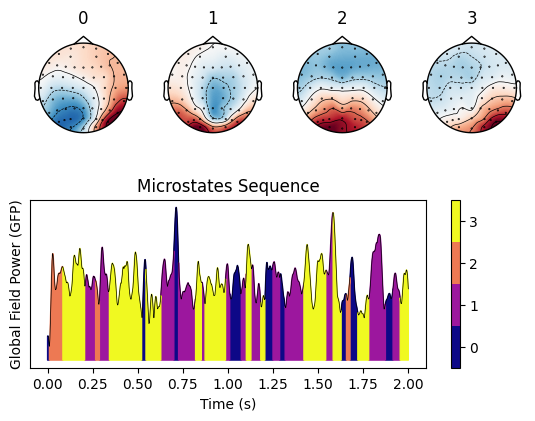

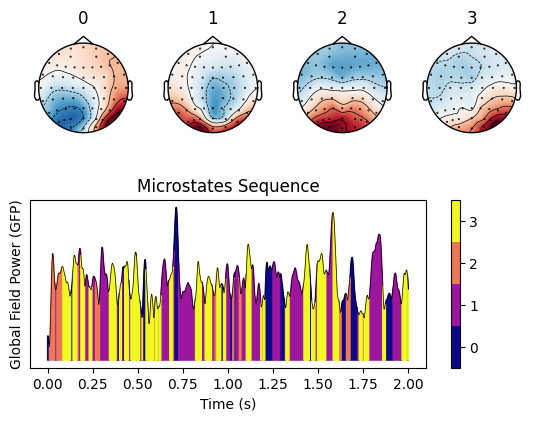

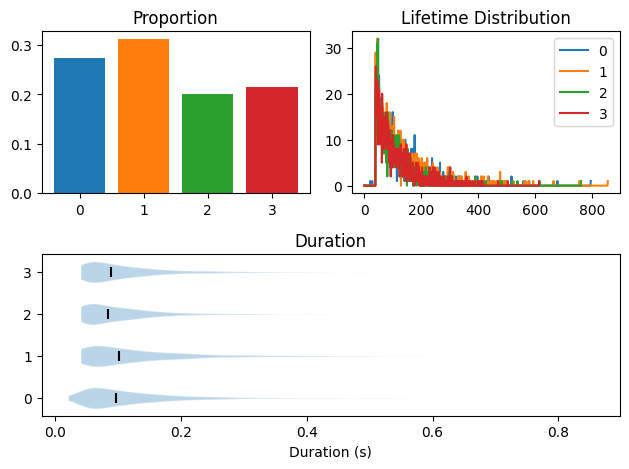

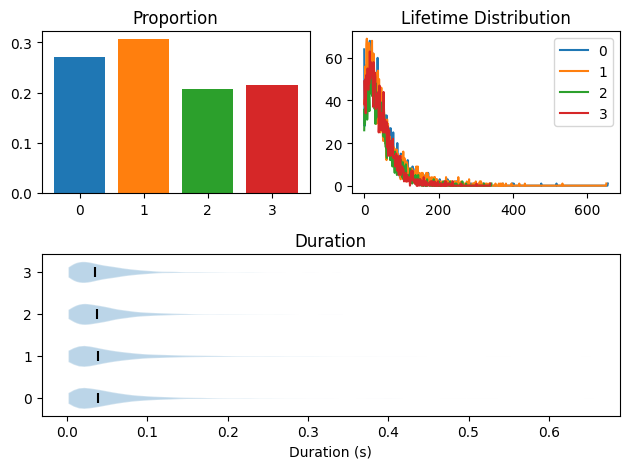

In [865]:
nk.microstates_plot(ms_thresholded, epoch = (0, 2048*2))
nk.microstates_plot(microstates, epoch = (0, 2048*2))
nk.microstates_static(ms_thresholded, show=True)
nk.microstates_static(microstates, show=True)

In [866]:
raw_events = mne.events_from_annotations(raw)
raw_events[0]
# type(raw_events[0]
# ls = list(filter(lambda x: x[2] != 2, raw_events[0]))
# np.array(ls)

Used Annotations descriptions: ['Impedance', 'boundary', 's1', 's11', 's12', 's3', 's4']


array([[     0,      0,      2],
       [ 48311,      0,      3],
       [ 48311,      0,      6],
       [ 48336,      0,      6],
       [ 84456,      0,      7],
       [ 84477,      0,      7],
       [ 86540,      0,      6],
       [ 86562,      0,      6],
       [ 90675,      0,      4],
       [ 90675,      0,      7],
       [ 90695,      0,      4],
       [152141,      0,      6],
       [152161,      0,      6],
       [156272,      0,      5],
       [156274,      0,      7],
       [156295,      0,      5],
       [217739,      0,      6],
       [217761,      0,      6],
       [221874,      0,      4],
       [221874,      0,      7],
       [221894,      0,      7],
       [221896,      0,      4],
       [283340,      0,      6],
       [283361,      0,      6],
       [287475,      0,      5],
       [287475,      0,      7],
       [287496,      0,      7],
       [348940,      0,      6],
       [348960,      0,      6],
       [353075,      0,      4],
       [35

In [867]:
raw_events[1]

{'Impedance': 1, 'boundary': 2, 's1': 3, 's11': 4, 's12': 5, 's3': 6, 's4': 7}

In [875]:
# transitions = [['s11', ['s2', 's3', 's4']], ['s4', ['s2', 's3', 's11']]]
# transitions = [['s11', ['s2', 's3']], ['s12', ['s2', 's3']]] # 14 - d1
transitions = [['s11', ['s3']], ['s12', ['s3']]] 

# key_names = ['s11', 's2', 's3', 's4']
# key_names = ['s11', 's12', 's2', 's3'] # 14 - d1
key_names = ['s11', 's12', 's3', 's1'] # 14 - d1

# key_namings = {'s11': "Closed", 's4': "Opened"}
key_namings = {'s11': "Closed", 's12': "Opened"}

# key_namings = {'s11': "Closed", 's12': "Opened"} # 14 - d1
# key_namings = {'s11': "Closed", 's4': "Opened"} # 14 - d2

# 6 - 4 6 - 5 | S(4 - 2 4 - 3)
# 3 - 4 3 - 5 | S(11 - 2 11 - 3)

# 7 - 5 7 - 6 | S(4-2 4-3)
# 4 - 5 4 - 6 | S(11-3 11-2)

# 4 - 7 4 - 6  | S(11-3 11-2)
# 8 - 7 8 - 6  | S(4-3 4-2)
 
# 4-6 4-7 4-5 ЗАКРЫТЫЕ S(11-3 11-4 11-2) 
# 7-6 7-5 ОТКРЫТЫЕ S(4-3 4-2)


# 
# Checking event:  51.1650390625 6
# Checking event:  51.17724609375 6
# Checking event:  109.24658203125 6
# Checking event:  158.2109375 7
# Checking event:  159.22900390625 6

#-4 Checking event:  161.248046875 4
#-6 Checking event:  191.26025390625 6

#-7 Checking event:  193.27880859375 7
#-6 Checking event:  223.291015625 6

#?4 Checking event:  225.31005859375 4
#?6

#-7 Checking event:  257.3408203125 7
#-6 Checking event:  287.353515625 6

#-4 Checking event:  289.37255859375 4
#-6 Checking event:  319.384765625 6

#-7 Checking event:  321.4033203125 7
#-6 Checking event:  351.416015625 6

#?4 Checking event:  353.43505859375 4
#?6

#-7 Checking event:  385.4658203125 7
#-6 Checking event:  415.478515625 6

#-4 Checking event:  417.49755859375 4
#?6

#-7 Checking event:  449.5283203125 7
#-5 Checking event:  479.541015625 5

print(get_event_bounds_by_event_transitions(raw_resample, key_names, key_namings, transitions))

Used Annotations descriptions: ['Impedance', 'boundary', 's1', 's11', 's12', 's3', 's4']
('Impedance', 1)
('boundary', 2)
('s1', 3)
('s11', 4)
('s12', 5)
('s3', 6)
('s4', 7)
([[90695, 152141], [156295, 217739], [221896, 283340], [287475, 348940], [353096, 414539], [418675, 480139], [484297, 545741], [549895, 611340], [615497, 676938]], [4, 5, 4, 5, 4, 5, 4, 5, 4], {4: 'Closed', 5: 'Opened'})


In [876]:
ms_sequences, events, event_names, timestamps = load_or_calc_event_splited_ms(
    filename = filename,
    needCalculation = True,
    # recalc = True,
    microstates = microstates,
    raw = raw_resample,
    key_names = key_names,
    key_namings = key_namings,
    transitions = transitions
)
ms_sequences_th, events_th, event_names_th, timestamps_th = load_or_calc_event_splited_ms(
    filename = filename + '_th',
    needCalculation = True,
    # recalc = True,
    microstates = ms_thresholded,
    raw = raw_resample,
    key_names = key_names,
    key_namings = key_namings,
    transitions = transitions
)

Calculating evented ms...
Used Annotations descriptions: ['Impedance', 'boundary', 's1', 's11', 's12', 's3', 's4']
('Impedance', 1)
('boundary', 2)
('s1', 3)
('s11', 4)
('s12', 5)
('s3', 6)
('s4', 7)
Calculating evented ms...
Used Annotations descriptions: ['Impedance', 'boundary', 's1', 's11', 's12', 's3', 's4']
('Impedance', 1)
('boundary', 2)
('s1', 3)
('s11', 4)
('s12', 5)
('s3', 6)
('s4', 7)


In [877]:
dynamic = load_or_calc_ms_dynamic_event_splited_ms(
    filename = filename,
    need_calculation = True,
    # recalc=True,
    ms_sequence = ms_sequences,
    events = events,
    event_names = event_names,
    timestamps = timestamps
)
dynamic_th = load_or_calc_ms_dynamic_event_splited_ms(
    filename = filename+'_th',
    need_calculation = True,
    # recalc=True,
    ms_sequence = ms_sequences_th,
    events = events_th,
    event_names = event_names_th,
    timestamps = timestamps_th
)

Calculating dynamic statistics...
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Calculating dynamic statistics...
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed


In [878]:
dyn_dropped = drop_self_to_self(4, dynamic)
dyn_dropped_th = drop_self_to_self(4, dynamic_th)

Microstate_0_to_0
Microstate_1_to_1
Microstate_2_to_2
Microstate_3_to_3
Microstate_0_to_0
Microstate_1_to_1
Microstate_2_to_2
Microstate_3_to_3


In [879]:
def mean_by_event(df):
    clone = df.copy()
    clone.drop('Order', axis=1, inplace=True)
    return clone.groupby('Event').mean()

In [880]:
mean = mean_by_event(dyn_dropped)
mean_th = mean_by_event(dyn_dropped_th)

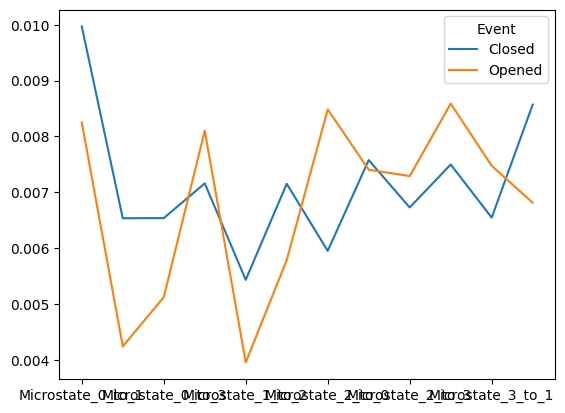

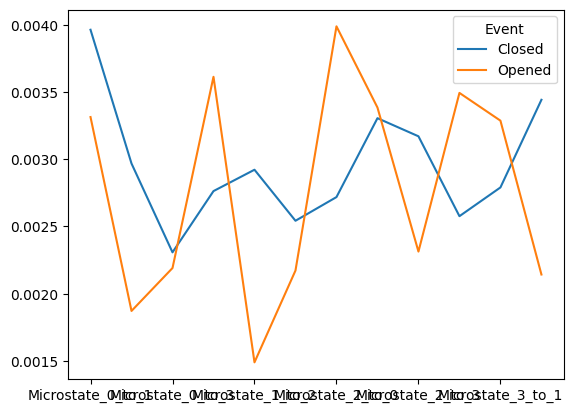

In [881]:
mean.T.plot()
mean_th.T.plot()
mean.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/'+filename+'_mean.csv')
mean_th.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/'+filename+'_th_mean.csv')

FileNotFoundError: [Errno 2] No such file or directory: './save_data/ms_event_splited_statistics/dynamic/mean/ACP_INP0014_REST2_1pnt_2vis_th_mean.csv'

In [122]:
# ms.plot_maps(maps, raw_bv_reconst_reref.info) 
# nk.microstates_plot(microstates, epoch = (0, 2048*10))
# ms.plot_segmentation(segmentation[:2048], raw_bv_reconst_reref.get_data()[:, :2048], raw_bv_reconst_reref.times[:2048])
# nk.microstates_static(microstates, sampling_rate=sampling_rate, show=True)
# nk.microstates_dynamic(microstates, show=True)
# gfp = nk.eeg_gfp(raw_resample)
# 
# peaks = nk.microstates_peaks(raw_resample, gfp=gfp)
# 
# # Plot the peaks in the first 200 data points
# nk.events_plot(events = peaks[peaks < int(2048/2)], signal = gfp[0:int(2048/2)])